# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Head TA:*  **Dr Van Nguyen** | van.nguyen1@monash.edu <br/>
*Tutor:* **Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] | **Dr Binh Nguyen** \[binh.nguyen1@gmail.com\] | **Dr Mahmoud Mohammad** \[mahmoud.hossam@monash.edu\]
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

---
## <span style="color:#0b486b">Tutorial 02: Machine Learning Revisited</span>

The **purpose** of this tutorial is to revise the basic life-cycle of a machine learning project. It will focus on the following aspects:

1. A typical sequence of steps in designing a machine learning algorithm
2. How to implement these steps using open scikit-learn Python package
<br/>

**References and additional reading and resources**
- [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting)

---

 ## <span style="color:#0b486b">I. Steps to a Build Machine Learning Model</span>

All machine learning applications start with data. As a ML scientist, a major part of your daily work is to look at the data and draw insights from them. Machine learning algorithms are the underlying tools and methods for you to draw such insights. In fact, beyond just being tools, *they provide us a framework to think, generate new ideas and new data products*. As we progress along this course, I hope you will start to build up such intuition.

One of the most important forms of these "insights" is the prediction power from the data. The rest of this tutorial will step you through a typical setting of building such a ML-based prediction model. 

Our ML problem in this tutorial is **face recognition**. This problem can be reduced into two sequential steps:

1. A collection of images is given, containing **40** different individuals. There are **10**  images for each individual. From this dataset, build a predictive model.

2. When a **new (unseen)** image is presented to the system, **recognize** the individual in this image.

Face-based identification systems are now being used around the world, most popularly at airports. When applying for a passport, a photo of the applicant is taken. We can relate to this as step (1) where the system collects a database of face images to build the prediction model; and the authentication step at the airport is step (2). 

<img src="slide_images/02-prac02-1.jpg" width="400">

***However, a fixed and predefined dataset is all a data scientist has in advance, so how can we evaluate if our predictive model will perform well after it has been deployed, since we don't have access to unseen images/photos that the system will capture in the future?***

This scenario is encountered in most of the machine learning problems and this is one of the reasons that make modern data scientists different from traditional statistician's jobs.

To address this, a ML practitioner  will typically (randomly) split the given dataset $D$ into, what's called, the **training** dataset and **test** dataset. We then use the training dataset to build the model, and then use the test dataset, **as if the system has never seen it before**, to test how well the system will perform.

This line of logic naturally tells us three essential steps to build a machine learning pipeline:

* **Step 1**. **Preparing your dataset in the form that is applicable to apply a machine learning model** such as logistic regression, decision tree classifier and so forth. This usually also means that one might need to do necessary pre-processing steps (e.g., data cleaning) and then split the data into *training* and *test* datasets.
* **Step 2**. **Select a suitable or a set of suitable machine learning models** for your problem at hand and train them using the **training dataset**. This step requires a deep understanding of machine learning models available to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to interpret its outputs and so on.
* **Step 3**. **Evaluate the performance of the model** using the **test dataset**.

This presents the most essential pipeline. In practice, we usually repeat these steps several times and have several additional substeps such as: formulating sensible features (**feature extraction**), selecting important features (**feature selection**), selecting optimal model or parameters (**model selection**).

---
### <span style="color:#0b486b">Step 1. Preparing your dataset: pre-processing, training and test datasets</span>
To build a predictive model, a typical setting is to split the dataset into training and test dataset.

**<span style="color:blue"> 1.1 First, we load the dataset using scikit-learn </span>**

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


In [2]:
# When these datasets are loaded, they aren't loaded as NumPy arrays. They are of type Bunch. 
# A Bunch is a common data structure in Python. It's essentially a dictionary with the keys added to the object as attributes.

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/andrezhang/scikit_learn_data


In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [10]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(25,25))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]), color='red', fontsize=18)
        p.text(0, 60, str(i))
    fig.show()

/Users/andrezhang/opt/anaconda3/envs/py37spacy21/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


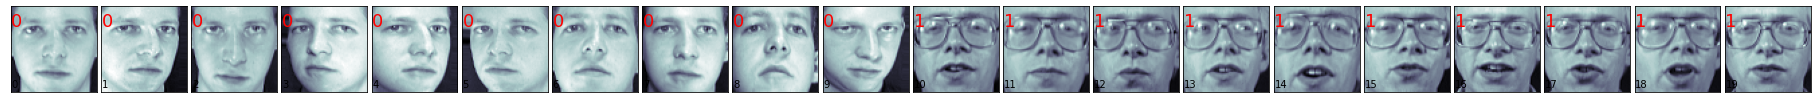

In [11]:
# display the first 20 images
display_faces(faces.images, faces.target, 20)


In [14]:
# pixel of img[0]
print(len(faces.data[0]))

4096


In [12]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

In [15]:
# number of class labels
n_classes = len(np.unique(y))
print(n_classes)

40


**<span style="color:blue"> 1.2 Next, we perform a pre-processing step to transform feature.</span>** In this case we use **principal component analysis (PCA)** to perform a **dimenentionality reduction** step, which is extremely useful when dealing with high-dimentional data as typically encountered in modern data science problem.

<img src="./slide_images/note.gif" width="50" align="left"></img> *If you are unfamiliar with PCA, it is highly recommended that you should learn and know how to apply it to your tasks. PCA involves *singular value decomposition* technique from linear algebra, which might appears somewhat complicated. From a practical point of view, it is sufficient to know that it can be used to reduce continuous-valued feature vectors in high-dimensional space to low-dimensional spaces. You can find an explanation for PCA in almost any data analysis, machine learning or AI text books. Its wikipedia entry can be found [here](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [33]:
# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
print(pca)

PCA(n_components=10)


In [34]:
pca_X = pca.fit_transform(X)

In [35]:
pca.explained_variance_ratio_

array([0.2381273 , 0.1399398 , 0.07968613, 0.04998324, 0.03609841,
       0.03156932, 0.02426832, 0.02036397, 0.01958114, 0.01672121],
      dtype=float32)

**<span style="color:blue"> 1.3 Next, since our problem is a prediction problem, a typical setup is to split the whole dataset into **training** and **test** sets.</span>**.

With sciki-learn, we can do this step using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [`StratifiedShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)

In [38]:
print("Number of training samples: " + str(len(train_X)))
print("Number of test samples: " + str(len(test_X)))

Number of training samples: 280
Number of test samples: 120


---
### <span style="color:#0b486b">Step 2. Choose one or more suitable machine learing models for your task.</span>

At this step, we need to select a suitable or a set of suitable machine learning models for your problem at hand and train them using the **training dataset**. 

<img src="slide_images/note.gif" width="40" align="left">This step requires deep understanding of machine learning models avaiable to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to intepret its outputs and so on. This [**scikit-learn cheat sheet**](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), for example, is a great place to start.

In this tutorial, we will *logisticRegression* implemented in scikit-learn as the prediction model. Its description can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**<span style="color:blue">2.1 Choose a sensible prediction model.</span>**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

**<span style="color:blue">2.2 Now we train the model using *training dataset*.</span>**

In [41]:
# train model
train_model = logistic.fit(train_X, train_y)

In [42]:
print(train_model.coef_)

[[-2.49610641e-01  9.32608352e-02  1.05718081e-01  5.84230577e-01
   5.64046862e-01 -3.60905986e-01 -3.64412524e-02 -1.52359894e+00
  -7.62761431e-02  3.65187002e-01]
 [-7.51629792e-02 -1.59335072e-01 -4.50416852e-01 -1.48823595e-01
   3.57749503e-01 -2.63450964e-01 -8.41886166e-01 -7.22011267e-01
  -7.02046958e-01  5.18982772e-02]
 [ 0.00000000e+00  0.00000000e+00  3.93423476e-01 -1.64656698e-01
   9.22391026e-03 -7.78220595e-02 -4.10067029e-01  1.00518613e+00
   2.00597994e-01 -1.24235053e+00]
 [-1.15525871e-01 -1.52362697e-01  0.00000000e+00  0.00000000e+00
   1.77349525e-01  2.08391686e-01 -8.77774747e-01  2.37537295e-01
   0.00000000e+00  3.73480305e-02]
 [-9.43067981e-02  2.72945227e-01  2.84106103e-01  1.29804769e-01
  -9.69835617e-01 -2.97021344e-01  1.34234178e-01 -3.56965111e-01
  -4.33824856e-01 -5.02100743e-01]
 [-5.12283731e-01 -4.36988949e-02  0.00000000e+00  3.08649870e-01
  -8.40903077e-01 -2.38928941e-01 -7.98424694e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00

---
### <span style="color:#0b486b">Step 3. Assessing the model performance using *test dataset*.</span>

**<span style="color:blue">3.1 Use the trained model to predict newly unseen data samples in the test datasets.</span>**

In [43]:
# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

In [44]:
# examine what was returned
print(pred_results)

[[-5.96906891 -9.13869839 -3.43677485 ... -3.95855371 -8.04503005
  -0.51823488]
 [-6.97112593 -4.53483627 -4.39574668 ... -5.03416403 -9.58766747
  -4.01859092]
 [-6.03779884 -8.11265833 -6.63747257 ... -6.99420454 -5.82752191
  -7.59491547]
 ...
 [-6.06600259 -7.88772382 -2.01289403 ... -1.16552154 -5.93252216
  -6.18945974]
 [-5.28952419 -6.50493492 -2.79744595 ... -2.66634255 -8.01303236
  -4.60025639]
 [-2.32057177  0.79434536 -8.32374018 ... -6.60009609 -9.95672531
  -6.28955668]]


In [45]:
# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

In [46]:
# print the first few predicted labels to gain a sense of how the model is performing
print(pred_labels[0:10])

[9, 4, 22, 23, 35, 2, 6, 18, 30, 8]


In [47]:
# print the first few prediction against the true labels
for i in range(10):
    print(str(test_y[i]) + " predicted as " + str(pred_labels[i]))

9 predicted as 9
3 predicted as 4
22 predicted as 22
15 predicted as 23
35 predicted as 35
2 predicted as 2
6 predicted as 6
18 predicted as 18
30 predicted as 30
22 predicted as 8


**<span style="color:blue">3.2 Generate a report against model assessment and performance metrics.</span>**
The performance metrics can be different depending on the task at hand. Typically, it falls into either a **classification** or **regression** problems. 

Our current is face recognition, hence it is a classification problem. To assess the performance of a classification problem, important metrics include: **precision**, **recall**, **accuracy**  and **F-score** which can be derived from the **confusion_matrix**.

The following figure from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) clearly shows how the above metrics (highlighted with blue rectangles) are computed from the confusion matrix.
<img src="slide_images/precision.png" width="1200">

Besides the above common ones, there are also other metrics for performance evaluation as shown in the figure. Scikit-learn has provided several pre-implementated modules to compute these metrics, which can be founded [here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [48]:
# print out the confusion matrix
print(metrics.confusion_matrix(pred_labels, test_y))

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [49]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [50]:
np.unique(pred_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39], dtype=int64)

In [51]:
# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(pred_labels)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.67      1.00      0.80         2
    person 1       1.00      1.00      1.00         4
    person 2       0.60      1.00      0.75         3
    person 3       0.33      0.50      0.40         2
    person 4       0.00      0.00      0.00         1
    person 5       1.00      1.00      1.00         2
    person 6       0.40      0.67      0.50         3
    person 7       1.00      1.00      1.00         2
    person 8       1.00      0.50      0.67         2
    person 9       0.50      0.33      0.40         3
   person 10       1.00      0.60      0.75         5
   person 11       1.00      1.00      1.00         2
   person 12       0.50      0.33      0.40         3
   person 13       1.00      1.00      1.00         1
   person 14       1.00      1.00      1.00         4
   person 15       0.67      0.67      0.67         3
   person 16       1.00      1.00      1.00         2
   person 17       1.00    

## <span style="color:#0b486b">II. Summary </span>
Up to now, you should understand the general principle as well concrete steps to build a typical machine learning model. Given a training dataset, these main steps can be summarized as follows:

* **<span style="color:#0b486b"> Step 1. Preparing your dataset: pre-processing, training and test datasets</span>**
    * 1.1 load the dataset
    * 1.2 perform necessary feature pro-processing steps.
    * 1.3 construct the training and test sets. A typical spliting proportion is 70% for training and 30% for test.
* **<span style="color:#0b486b">Step 2. Choose a suitable machine learning model for your problem at hand.</span>**
    * 2.1 Pick a sensible model and initialize it
    * 2.2 Train this model using **training** set
* **<span style="color:#0b486b">Step 3. Assess the performance of your modelling choice using *test* dataset.</span>**
    * 3.1 Use trained model to predict newly and unseen data samples from **test** dataset.
    * 3.2 Produce a performance report against model assessment metrics depending on which type of machine learning problems you are working with (e.g., classification or regression).

## <span style="color:#0b486b">III. Put It All Together</span>
Follow the summary above and put all above code segments together we end up the following piece of codes for our face detection problem.

<img src="slide_images/note.gif" width="40" align="left"></img>*Before proceeding to execute the following codes, you might want to start from everything from scatch. One way to do this is to **restart the kernel** by **pressing the digit '0' twice** from your keyboard.*

In [52]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [53]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

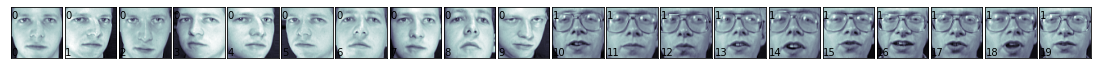

In [54]:
# load face datasets
faces = datasets.fetch_olivetti_faces()

# display the first 20 images
display_faces(faces.images, faces.target, 20)

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

# number of class labels
n_classes = len(np.unique(y))

# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
pca = decomposition.PCA(n_components=10)
pca_X = pca.fit_transform(X)

# split into training and test sets
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)

In [55]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

# train model
train_model = logistic.fit(train_X, train_y)

# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(pred_labels)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.67      1.00      0.80         2
    person 1       1.00      1.00      1.00         4
    person 2       0.60      1.00      0.75         3
    person 3       0.33      0.50      0.40         2
    person 4       0.00      0.00      0.00         1
    person 5       1.00      1.00      1.00         2
    person 6       0.40      0.67      0.50         3
    person 7       1.00      1.00      1.00         2
    person 8       1.00      0.50      0.67         2
    person 9       0.50      0.33      0.40         3
   person 10       1.00      0.60      0.75         5
   person 11       1.00      1.00      1.00         2
   person 12       0.50      0.33      0.40         3
   person 13       1.00      1.00      1.00         1
   person 14       1.00      1.00      1.00         4
   person 15       0.67      0.67      0.67         3
   person 16       1.00      1.00      1.00         2
   person 17       1.00    

## <span style="color:#0b486b">IV. Automate Machine Learning Pipline</span>
Scikit-learn provides a Pipeline utility to help automate machine learning pipeline which executes a linear sequence of data transformation and model fitting to be chained together. The following code summarizes and packs above steps into a machine learning pipeline for our face detection problem.

In [56]:
from sklearn import datasets
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# load face datasets
faces = datasets.fetch_olivetti_faces()

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

# create pipeline
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=10)))
estimators.append(('logistic', LogisticRegression(penalty='l1', solver='liblinear')))
model = Pipeline(estimators)

# evaluate pipeline
kfold = StratifiedShuffleSplit(n_splits=5,test_size = 0.3) # split into training and test sets with n_splits times.

results = cross_val_score(model, X, y, cv=kfold) # run the model with n_splits datasets and evaluate output.

print(results) # print accuracy for n_splits times of data
print(results.mean())

[0.85833333 0.85833333 0.8        0.76666667 0.86666667]
0.8300000000000001


## <span style="color:#0b486b">V. Practical Coding Exercises</span>

1. In section III, what is the performance if we don't perform the dimensionality reduction step? Will the precision of the face recognition problem increase or decrease? Use the above codes as the template, write your own codes to demonstrate this.
2. Learning the lesson from step (1) above, vary the dimensionality in {2, 5, 10, 15, and 20} (e.g., the parameter `n_components`). Which number of components give the best results?
3. Logistic regression is not the best predictive model choice for this problem. Read the description for the Support Vector Machines (SVM) from scikit-learn [here](http://scikit-learn.org/stable/modules/svm.html). What is the performance now if the classifier is SVM instead of LogisticRegression?. 

### <span style="color:#FFA500"> Exercise 1's solution </span> ###

In [57]:
from sklearn import datasets
import numpy as np
from sklearn import metrics

In [58]:
faces= datasets.fetch_olivetti_faces()
X_data,y_data= faces.data, faces.target
print(X_data.shape, y_data.shape)

(400, 4096) (400,)


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print("Since we wanna experiment on the original dataset, we do not need to use PCA for dimensionality reduction.")
print("Let's train using LogisticRegression")

(280, 4096) (120, 4096)
(280,) (120,)
Since we wanna experiment on the original dataset, we do not need to use PCA for dimensionality reduction.
Let's train using LogisticRegression


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(C=0.1, max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc1= accuracy_score(y_pred, y_test)
print(accuracy_score(y_pred, y_test))
print("Let's reduce the dimension to 15 to compate")

0.925
Let's reduce the dimension to 15 to compate


In [61]:
from sklearn.decomposition import PCA
pca15 = PCA(n_components=100)
pca_X = pca15.fit_transform(X_data)

In [62]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test= train_test_split(pca_X, y_data, test_size=0.3)
clf.fit(pca_X_train, pca_y_train)
y_pred= clf.predict(pca_X_test)
acc2= accuracy_score(y_pred, pca_y_test)
print("With dimension reduction: {}, without dimension reduction:{}".format(acc2, acc1))
if acc1 > acc2:
    print("Trainning on the original dataset is better!")
else:
    print("Trainning on the dimension-reduced dataset is better!")

With dimension reduction: 0.925, without dimension reduction:0.925
Trainning on the dimension-reduced dataset is better!


### <span style="color:#FFA500"> Exercise 2's solution </span> ###

In [63]:
from sklearn import datasets
import numpy as np
from sklearn import metrics

In [64]:
faces= datasets.fetch_olivetti_faces()
X_data,y_data= faces.data, faces.target
print(X_data.shape, y_data.shape)

(400, 4096) (400,)


In [65]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(C=0.1, max_iter=10000)
n_list= [2,5,10,15,20]
max_acc = 0

for n in n_list:
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X_data)
    X_train, X_test, y_train, y_test= train_test_split(pca_X, y_data, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc= accuracy_score(y_pred, y_test)
    print("n_components={}, accuracy={}".format(n, acc))
    if acc > max_acc:
        n_best = n
        max_acc = acc

print("\nThe best number of components is {} and the corresponding accuracy is {}".format(n_best, max_acc))

n_components=2, accuracy=0.075
n_components=5, accuracy=0.4083333333333333
n_components=10, accuracy=0.7416666666666667
n_components=15, accuracy=0.825
n_components=20, accuracy=0.875

The best number of components is 20 and the corresponding accuracy is 0.875


### <span style="color:#FFA500"> Exercise 3's solution </span> ###

In [66]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

print("For a kernel method such as SVM, it really needs to scale data into [-1,1]")
X_data = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_data)
print("\nx_min={}, x_max={}".format(np.min(X_data), np.max(X_data)))

pca = PCA(n_components=20)
pca_X = pca.fit_transform(X_data)
X_train, X_test, y_train, y_test= train_test_split(pca_X, y_data, test_size=0.3)
C= 2**(3)
G= 2**(-9)
print("\nWe are using a SVM with the trade-off paramater C={}, the kernel width gamma={}, and rbf kernel".format(C,G))
svm_clf = SVC(C=C, gamma= G, kernel="rbf", max_iter=10000)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_pred, y_test)
print("\nTest accuracy of SVM is {}".format(svm_acc))

For a kernel method such as SVM, it really needs to scale data into [-1,1]

x_min=-1.0000001192092896, x_max=1.000000238418579

We are using a SVM with the trade-off paramater C=8, the kernel width gamma=0.001953125, and rbf kernel

Test accuracy of SVM is 0.9333333333333333


---
### <div  style="text-align:center">**THE END**</div>